<h1>Phase 2 (EDL - Data Analysis Phase)</h1>
<h3>1. Open new Jupyter notebook</h3>

<h3>2. Import required libraries</h3>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>3. Read your cleaned csv which you did in phase 1</h3>

In [15]:
df = pd.read_csv("clean_data.csv")

<h3>4. Shape the data</h3>

In [16]:
print(f"rows: {df.shape[0]}, columns:{df.shape[1]}")#use shape to show the number of rows and columns

rows: 815, columns:16


<h3>5. Show first five records</h3>

In [17]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


<h3>6. Show all columns of the dataframe</h3>

In [31]:
for col in df.columns:#print column names
    print(col)

Name
Platform
Year_of_Release
Genre
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales
Global_Sales
Critic_Score
Critic_Count
User_Score
User_Count
Developer
Rating


<h3>7. Show last 5 five rows</h3>

In [19]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
810,Call of Duty 3,PS3,2006,Shooter,Activision,0.60,0.62,0.03,0.26,1.5,80.0,43.0,6.9,92.0,Treyarch,T
811,Tokyo Xtreme Racer Zero,PS2,2000,Racing,Crave Entertainment,0.66,0.52,0.15,0.17,1.5,76.0,15.0,8.9,64.0,Genki,E
812,Red Faction II,PS2,2002,Shooter,THQ,0.49,0.78,0.00,0.23,1.5,84.0,30.0,8.3,35.0,Volition Inc.,M
813,Madden NFL 2001,PS2,2000,Sports,Electronic Arts,1.19,0.07,0.05,0.20,1.5,91.0,25.0,7.7,7.0,EA Sports,E
814,Star Wars: The Force Unleashed II,PS3,2010,Action,LucasArts,0.80,0.49,0.00,0.21,1.5,63.0,41.0,6.8,121.0,LucasArts,T


<h3>8. Describe the data.</h3>

In [20]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,2007.441718,1.854209,1.205436,0.334123,0.420172,3.813742,81.271166,45.786503,7.627485,612.626994
std,4.535823,2.257281,1.656582,0.742909,0.676967,4.574075,10.447545,24.315313,1.254410,1165.358740
min,1996.000000,0.010000,0.000000,0.000000,0.000000,1.500000,20.000000,4.000000,1.900000,4.000000
25%,2004.000000,0.890000,0.480000,0.000000,0.170000,1.870000,76.000000,25.000000,7.100000,55.000000
50%,2008.000000,1.320000,0.810000,0.040000,0.250000,2.560000,83.000000,42.000000,7.900000,142.000000
75%,2011.000000,2.070000,1.355000,0.290000,0.440000,4.045000,88.000000,65.000000,8.500000,683.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.400000,10179.000000


<h3>9. Group the sales data of each region on Year_of_Release and plot the same</h3>
<h4>(It should show which region sales was at peak on which year of release)</h4>

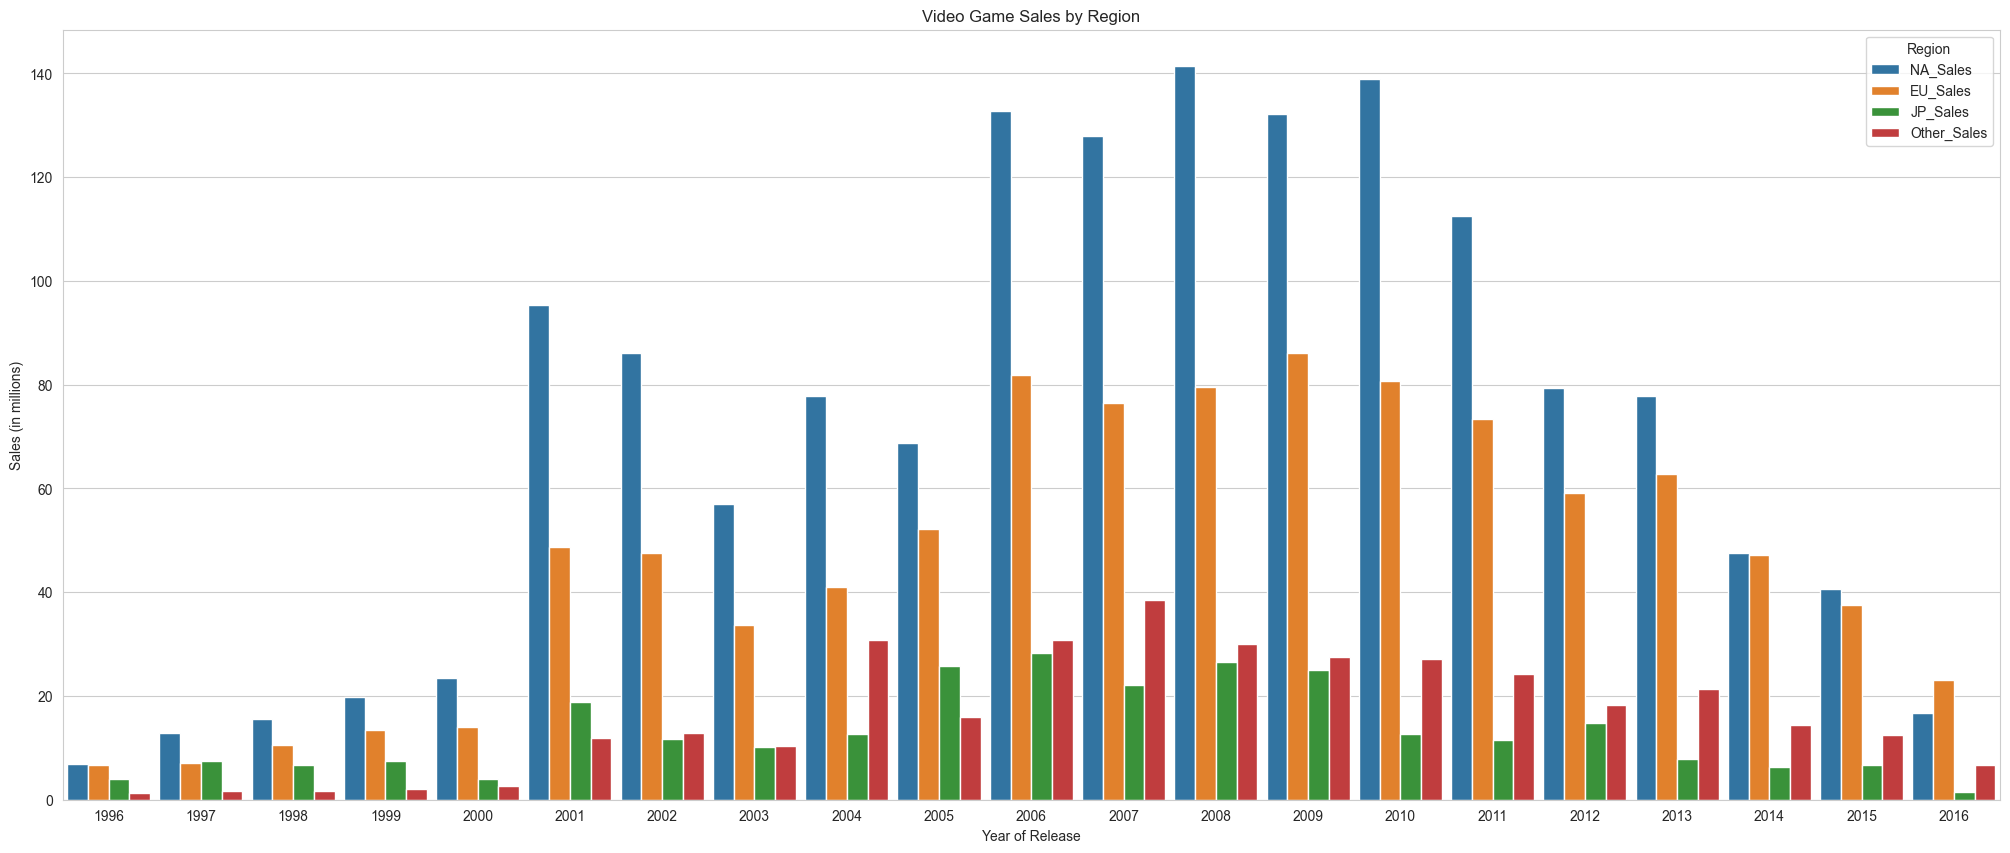

In [21]:
# Group the data by Year_of_Release and sum the sales for each region
sales_by_year = df.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the data to a long format for Seaborn
melted_sales = pd.melt(sales_by_year, id_vars=['Year_of_Release'], var_name='Region', value_name='Sales')

# Create a figure and axis object with a specified width
fig, ax = plt.subplots(figsize=(25, 10))

# Create a bar plot using Seaborn
sns.set_style("whitegrid")
sns.barplot(x='Year_of_Release', y='Sales', hue='Region', data=melted_sales, width=0.9)#set width to 0.9 so there would be less padding between the years resulting in wider bars


# Set the plot title and axis labels
plt.title('Video Game Sales by Region')
plt.xlabel('Year of Release')
plt.ylabel('Sales (in millions)')

# Display the plot
plt.show()


<h3>10. Group North American, Japan, European & Other region sales data as
per Genre and plot it</h3> <h4>(It should show highest of region according to game
category , ex- NA_Sales is highest in Adventure category , plot kind
should be bar)</h4>

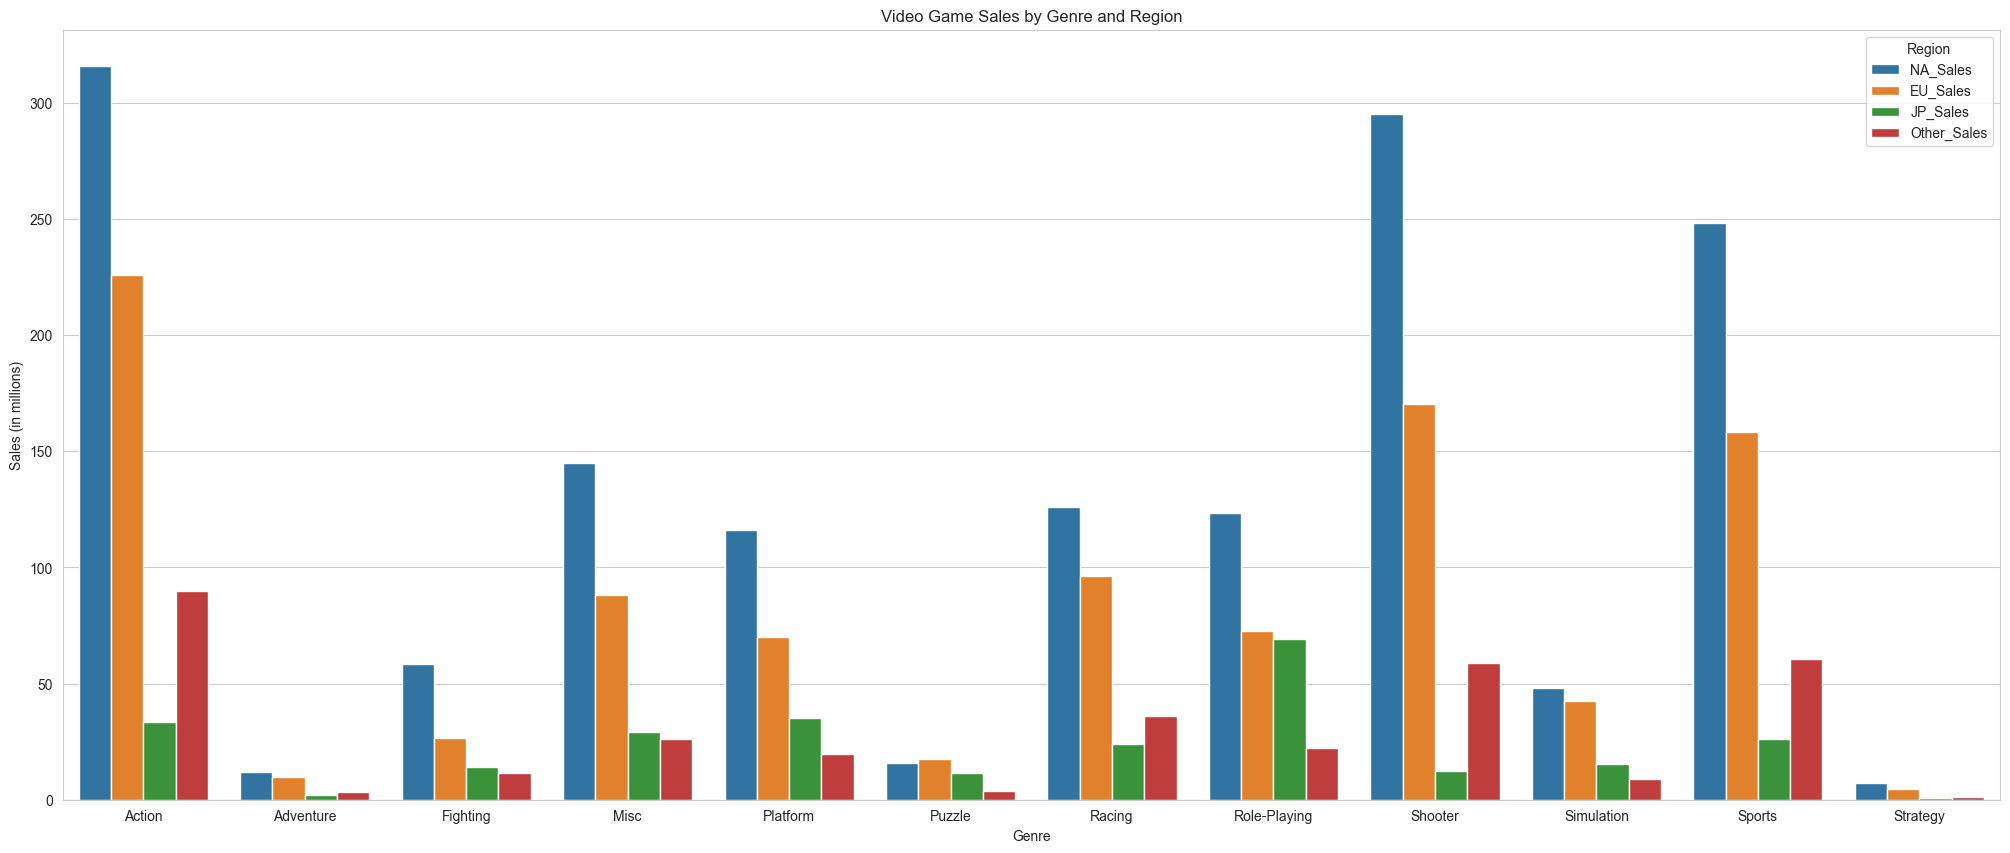

In [22]:
# Group the data by Genre and sum the sales for each group
sales_by_genre_region = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the data to a long format for Seaborn
melted_sales = pd.melt(sales_by_genre_region, id_vars=['Genre'], var_name='Region', value_name='Sales')

# Create a figure and axis object with a specified width
fig, ax = plt.subplots(figsize=(25, 10))

# Create a bar plot using Seaborn
sns.set_style("whitegrid")
sns.barplot(x='Genre', y='Sales', hue='Region', data=melted_sales)

# Set the plot title and axis labels
plt.title('Video Game Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')

# Display the plot
plt.show()



<h3>11. Group North American, Japan, European & Other region sales data as
per Platform and plot it</h3> <h4>(Should show sales as per "Platform genre" , plot
kind should be bar )</h4>

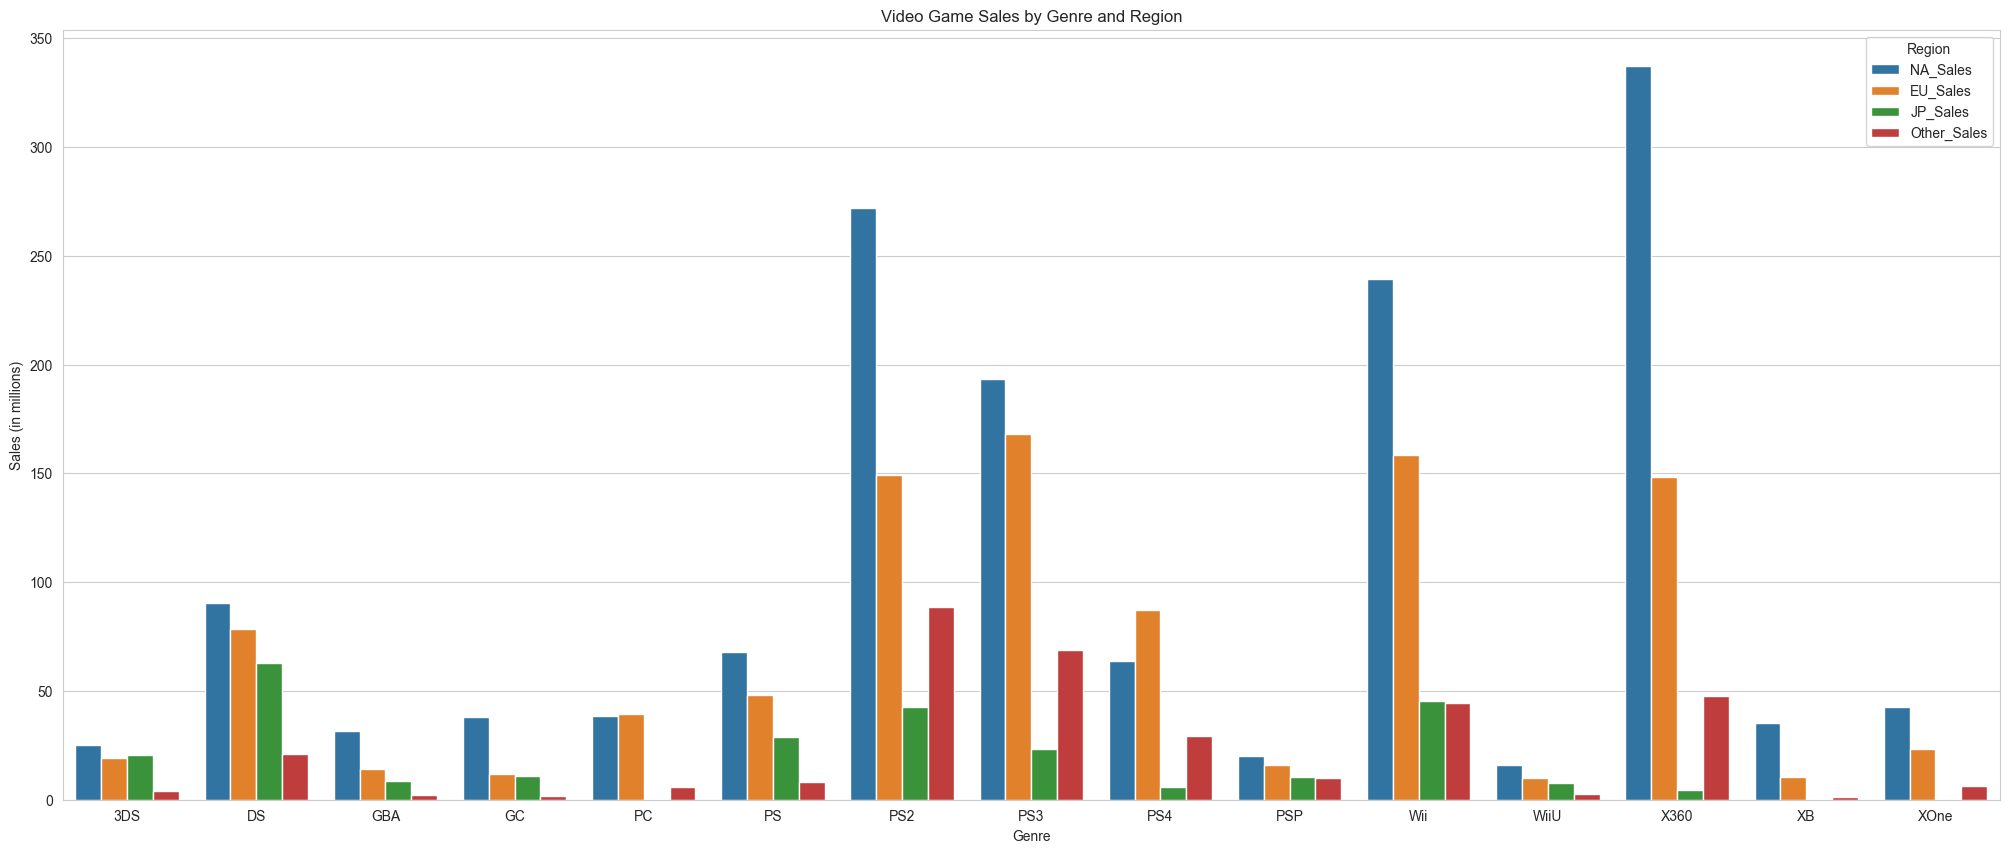

In [23]:
# Group the data by platform and sum the sales for each group
sales_by_platform_genre = df.groupby(['Platform'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt the data to a long format for Seaborn
melted_sales = pd.melt(sales_by_platform_genre, id_vars=['Platform'], var_name='Region', value_name='Sales')

# Create a figure and axis object with a specified width
fig, ax = plt.subplots(figsize=(25, 10))

# Create a bar plot using Seaborn
sns.set_style("whitegrid")
sns.barplot(x='Platform', y='Sales', hue='Region', data=melted_sales)

# Set the plot title and axis labels
plt.title('Video Game Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')

# Display the plot
plt.show()

<h3>12. Plot the Sales in all regions as per Platform.</h3> <h4>You need to create a
boxplot for that which will show the distribution of sales as per platform</h4>

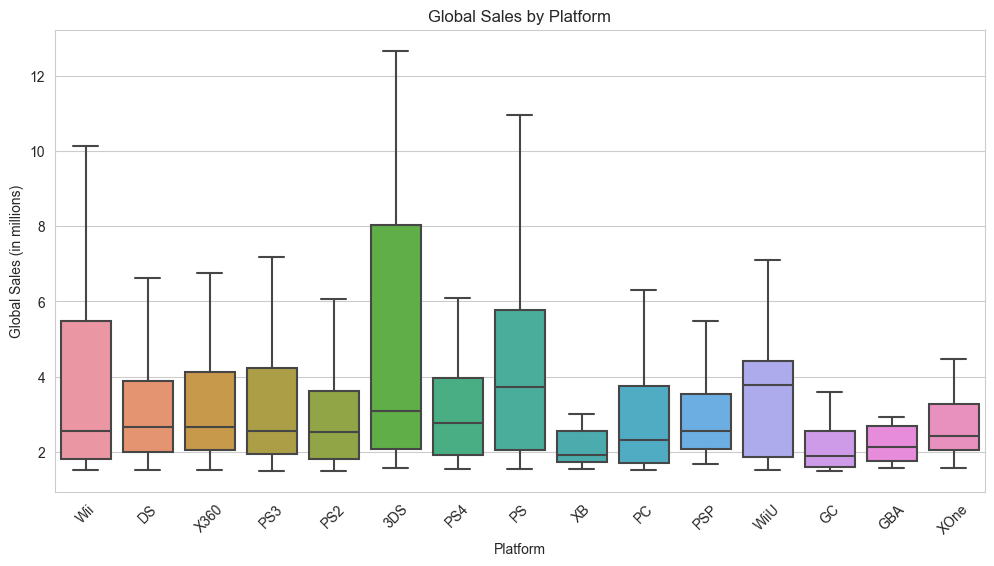

In [24]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot using Seaborn
sns.boxplot(x='Platform', y='Global_Sales', data=df, showfliers=False)#showflies is set to false to hide the outliers

# Set the plot title and axis labels
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


<h3>13. Find out which Genre games are sold in highest numbers</h3> <h4>(create a
countplot of seaborn which could do that)</h4>

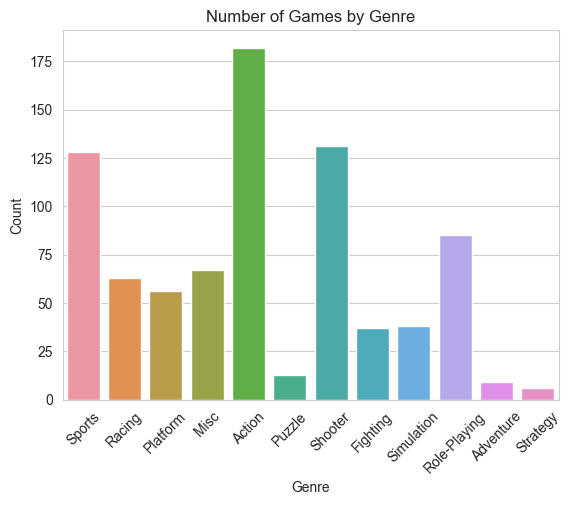

In [25]:
# Create a countplot of the 'Genre' column using Seaborn
sns.set_style("whitegrid")
sns.countplot(x='Genre', data=df)

# Set the plot title and axis labels
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()


<h3>14. Try to find out global sales as per Genre</h3><h4>(create a barplot of seaborn
for that)</h4>

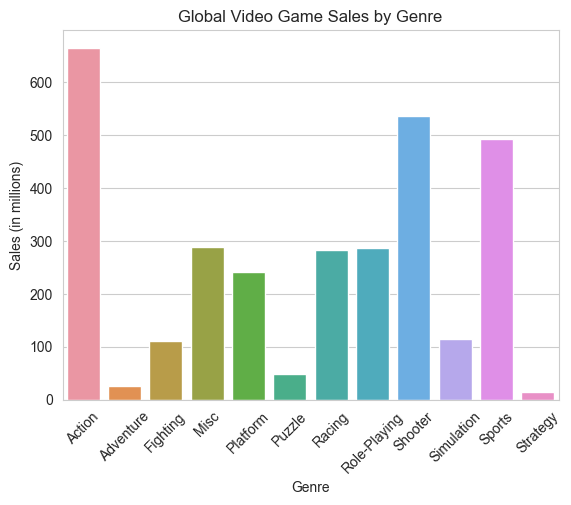

In [26]:
# Group the data by Genre and sum the global sales
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Create a barplot using Seaborn
sns.set_style("whitegrid")
sns.barplot(x='Genre', y='Global_Sales', data=sales_by_genre)

# Set the plot title and axis labels
plt.title('Global Video Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()
